## CONTENT

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

## Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

### Importing the Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Importing & Exploring Data


In [3]:
# Loading the data from csv file..

data = pd.read_csv('Mall customers.csv')

In [4]:
# Top datasets of data..

data.head()

,Unnamed: 0,Gender,Age,Annual_Income,Spending_Score
0,0,Male,19,15,39
1,1,Male,21,15,81
2,2,Female,20,16,6
3,3,Female,23,16,77
4,4,Female,31,17,40


In [5]:
# Number of Rowa and Columns in data..

data.shape

(198, 5)

In [6]:
# Getting some informations about the data..

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      198 non-null    int64 
 1   Gender          198 non-null    object
 2   Age             198 non-null    int64 
 3   Annual_Income   198 non-null    int64 
 4   Spending_Score  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Checking the number of missing values in columns percentage..

data.isnull().sum()

Unnamed: 0        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [8]:
# Getting some statistical measuresthe data..
# For non-objective columns..

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,198.0,98.500000,57.301832,0.0,49.25,98.5,147.75,197.0
Age,198.0,38.929293,14.016852,18.0,28.25,36.0,49.00,70.0
Annual_Income,198.0,59.787879,25.237259,15.0,40.50,61.0,77.75,126.0
Spending_Score,198.0,50.196970,25.746846,1.0,35.00,50.0,72.75,99.0


In [9]:
# For objective column..

data.describe(include='object').T

,count,unique,top,freq
Gender,198,2,Female,112


In [10]:
# Correlationship between columns..

data.corr()

,Unnamed: 0,Age,Annual_Income,Spending_Score
Unnamed: 0,1.000000,-0.017285,0.984367,0.013840
Age,-0.017285,1.000000,0.004406,-0.329421
Annual_Income,0.984367,0.004406,1.000000,0.010080
Spending_Score,0.013840,-0.329421,0.010080,1.000000


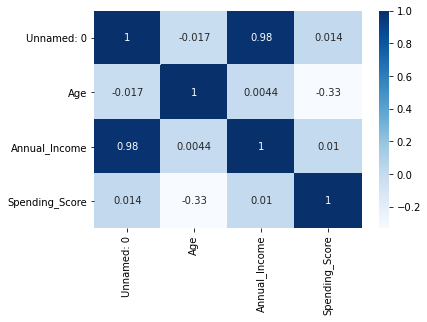

In [11]:
# visualizing the correlationship..

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

### Data Visualisation

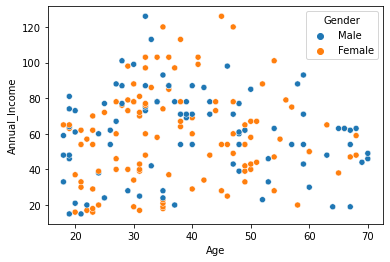

There is no correlation between Age & Annual Income


In [12]:
sns.scatterplot(x='Age',y='Annual_Income',hue='Gender',data=data)
plt.show()
print('There is no correlation between Age & Annual Income')

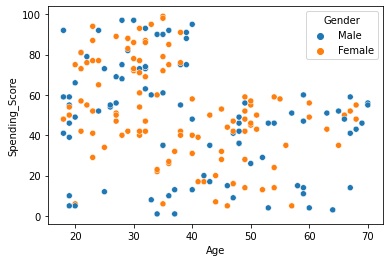

In [13]:
sns.scatterplot(x='Age',y='Spending_Score',hue='Gender',data=data)
plt.show()

As we can observe from above scatterplot as Age increases the Spending Score decrease..

Below 40 age spend: More 

Above 40 age spend: Less

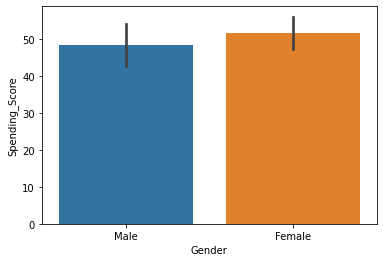

In [14]:
sns.barplot(y='Spending_Score',x='Gender',data=data)
plt.show()

Female's Spending Score is more than Male's..

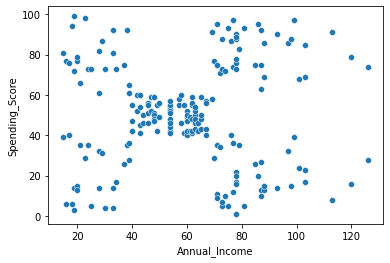

In [15]:
sns.scatterplot(x='Annual_Income',y='Spending_Score',data=data)
plt.show()


### Feature Selection


In [16]:
# Deleting all unimportant columns..

del data['Unnamed: 0']
del data['Age']
del data['Gender']

In [17]:
data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Scaling the data

In [18]:
# Importing StandardScaler sklearn library..

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
# Scaling the data..

data_s = sc.fit_transform(data)

In [20]:
data_s

array([[-1.77917141, -0.43598941],
       [-1.77917141,  1.19941337],
       [-1.73944701, -1.72094874],
       [-1.73944701,  1.04366072],
       [-1.69972262, -0.39705125],
       [-1.69972262,  1.00472256],
       [-1.65999822, -1.72094874],
       [-1.65999822,  1.70560947],
       [-1.62027383, -1.83776323],
       [-1.62027383,  0.84896992],
       [-1.62027383, -1.40944345],
       [-1.62027383,  1.90030028],
       [-1.58054943, -1.37050529],
       [-1.58054943,  1.04366072],
       [-1.58054943, -1.44838161],
       [-1.58054943,  1.12153705],
       [-1.54082504, -0.59174206],
       [-1.54082504,  0.61534095],
       [-1.46137625, -0.82537103],
       [-1.46137625,  1.86136212],
       [-1.42165185, -0.59174206],
       [-1.42165185,  0.88790808],
       [-1.38192745, -1.75988691],
       [-1.38192745,  0.88790808],
       [-1.26275427, -1.40944345],
       [-1.26275427,  1.23835153],
       [-1.26275427, -0.70855655],
       [-1.26275427,  0.42065014],
       [-1.22302987,

## Model Application

### K-Means clustering

In [21]:
# Importing K-means model..

from sklearn.cluster import KMeans

#### Choosing the number of clusters
     WCSS -Within Cluster sum of squares 

In [22]:
# WCSS = inertia  

ks = range(1,10)
inertia = []
for k in ks:
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit_predict(data_s)
    inertia.append(model.inertia_)

In [23]:
inertia

[396.0,
 267.0325246019484,
 156.23784749493421,
 106.14889229714835,
 61.08666097712,
 52.430459031206624,
 43.93186992398122,
 35.83364498318027,
 31.02058059864088]

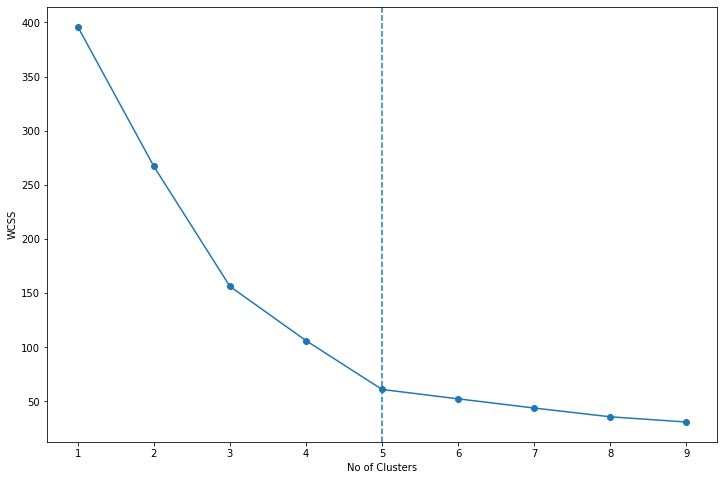

Optimum number of Clusters are 5 


In [24]:
# Ploting the Elbow Graph..

plt.figure(figsize=(12,8))
plt.plot(ks,inertia,'-o')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=5,linestyle='--')
plt.xticks(ks)
plt.show()

print("Optimum number of Clusters are 5 ")

In [25]:
# Storing model..

model_km = KMeans(n_clusters=5)

In [26]:
# Predicting the labels..

label = model_km.fit_predict(data_s)
label

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2])

In [27]:
data_s = pd.DataFrame(data_s)

In [28]:
data_s['label'] = label
data_s

,0,1,label
0,-1.779171,-0.435989,0
1,-1.779171,1.199413,4
2,-1.739447,-1.720949,0
3,-1.739447,1.043661,4
4,-1.699723,-0.397051,0
...,...,...,...
193,2.113819,1.588795,2
194,2.391890,-1.331567,3
195,2.391890,1.121537,2
196,2.630236,-0.864309,3


In [29]:
# Modle clusters..

model_km.cluster_centers_

array([[-1.33011303, -1.14026225],
       [-0.18671971, -0.01886436],
       [ 1.0098993 ,  1.24245028],
       [ 1.05488046, -1.27037859],
       [-1.35303699,  1.13569638]])

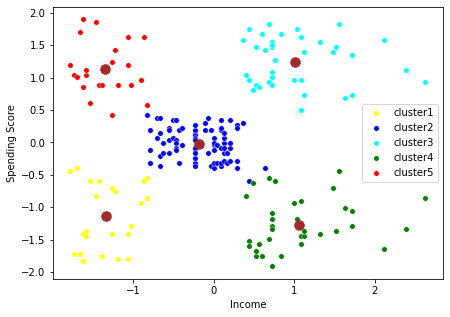

In [36]:
# Visualizing all 5 clusters in K-means Clustering..

plt.figure(figsize=(7,5))
sns.scatterplot(x=data_s[data_s['label']==0][0], y=data_s[data_s['label']==0][1],color='yellow',label='cluster1',s=30)
sns.scatterplot(x=data_s[data_s['label']==1][0], y=data_s[data_s['label']==1][1],color='blue',label='cluster2',s=30)
sns.scatterplot(x=data_s[data_s['label']==2][0], y=data_s[data_s['label']==2][1],color='cyan',label='cluster3',s=30)
sns.scatterplot(x=data_s[data_s['label']==3][0], y=data_s[data_s['label']==3][1],color='green',label='cluster4',s=30)
sns.scatterplot(x=data_s[data_s['label']==4][0], y=data_s[data_s['label']==4][1],color='red',label='cluster5',s=30)
plt.xlabel('Income')
plt.ylabel('Spending Score')

# Ploting Centroids..

plt.scatter(x=model_km.cluster_centers_[:,0],y=model_km.cluster_centers_[:,1], s=90,color='brown')
plt.savefig('img.pdf')
plt.show()

### Scoring

In [31]:
# Importing silhouette score..

from sklearn.metrics import silhouette_score

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1

 1: Means clusters are well apart from each other and clearly distinguished.

 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [32]:
# Scoring from K-Mens clustering..

silhouette_score(data_s.iloc[:,[0,1,2]],data_s['label'])

0.6788415892760243


###  Hierarchical Clustering


In [33]:
# Importing Hierarchy to see hierarchy of clustering..

import scipy.cluster.hierarchy as sch

In [34]:
# Let's make Dendrogram

plt.figure(figsize=(20,8))
sch.dendrogram(sch.linkage(data_s.iloc[:,[0,1,2]].values, method='ward'))
plt.axhline(y=13n, color='r', linestyle='--')
plt.show()

SyntaxError: invalid syntax (<ipython-input-34-b694e94fe4ca>, line 5)


### Agglomerative Clustering


In [ ]:
# Importing Agglomerative Clustering..

from sklearn.cluster import AgglomerativeClustering

In [ ]:
X = data_s.iloc[:,[0,1,2]]
model_agglo = AgglomerativeClustering(n_clusters=5)

In [ ]:
# Fitting the data..

model_agglo.fit(data_s)

In [ ]:
# Adding 'Agglo label' in data..

X['Agglo_label'] = model_agglo.fit_predict(X)
X.head()

In [ ]:
# Making Scatterplot of all 5 clusters in Agglomerative Clustering..

sns.scatterplot(x=X[X['Agglo_label']==0][0], y=X[X['Agglo_label']==0][1],color='yellow',s=30)
sns.scatterplot(x=X[X['Agglo_label']==1][0], y=X[X['Agglo_label']==1][1],color='blue',s=30)
sns.scatterplot(x=X[X['Agglo_label']==2][0], y=X[X['Agglo_label']==2][1],color='cyan',s=30)
sns.scatterplot(x=X[X['Agglo_label']==3][0], y=X[X['Agglo_label']==3][1],color='green',s=30)
sns.scatterplot(x=X[X['Agglo_label']==4][0], y=X[X['Agglo_label']==4][1],color='red',s=30)
plt.show()

#### Scoring

In [ ]:
# Scoring from Agglomerative  Clustering..

silhouette_score(X.iloc[:,[0,1,2]],X['Agglo_label'])

### Type of Customers

### Conclusion

By analysing the customers data we found some insight which are as follows:

1.Most of the customers whome age below 40 spend MORE.

2.Most of the customers whome age above 40 spend LESS.

3.Female's Spending Score is more than Male's

4.Basically there are 5 types of customers:

                i- Income less Spend More 
                
                ii- Income less Spend less ( according to there income )
                
                iii- Income normal Spend normal
                
                iv- Income High spend more
                
                v- Income High spend less 
                




### Strategy:

1.As we want to understand the customers like who can be easily converge or Target Customers, We can probably focus on the 1st, 4th type of customers becouse they spend the most.

2.Since 5th type of customer earn high but spend less so they could be our potential customers who can spend more.
